In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
data_1=pd.read_csv('/content/Coursework-data.csv')


In [ ]:
data_1.head()

,Call_Date,Call_Volume
0,01/03/2019,148
1,02/03/2019,110
2,03/03/2019,132
3,04/03/2019,193
4,05/03/2019,180


In [ ]:
data_1.set_index('Call_Date', inplace=True)
data_1.head()

,Call_Volume
Call_Date,
01/03/2019,148
02/03/2019,110
03/03/2019,132
04/03/2019,193
05/03/2019,180


In [ ]:
data_1.describe()

,Call_Volume
count,214.000000
mean,152.845794
std,36.994094
min,60.000000
25%,119.000000
50%,163.000000
75%,183.000000
max,210.000000


<Axes: xlabel='Call_Date'>

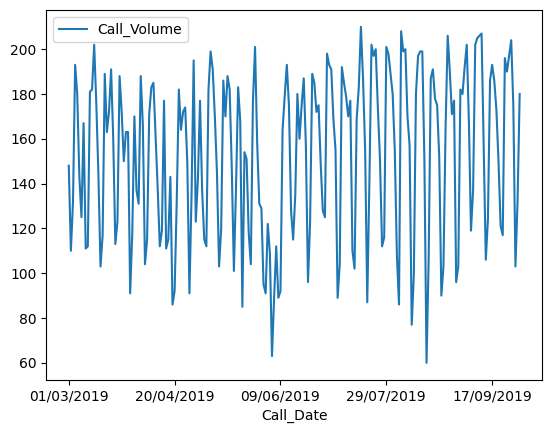

In [ ]:
data_1.plot()

<ipython-input-31-b7c4309a5496>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


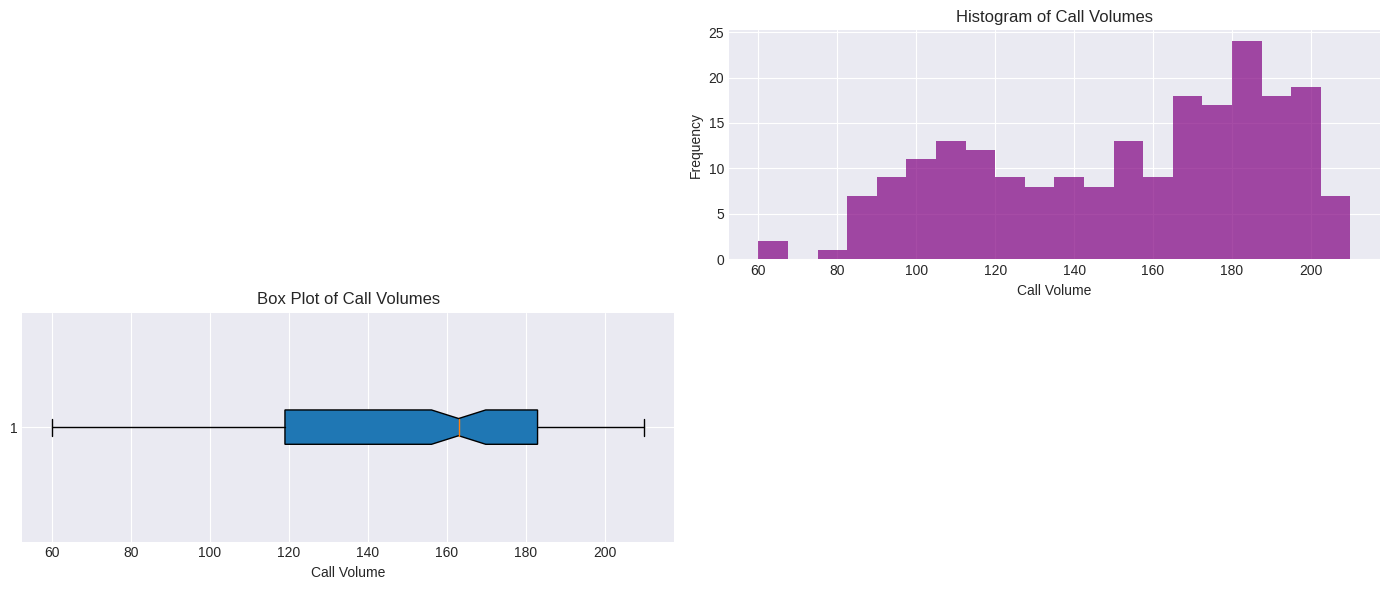

In [ ]:
import matplotlib.pyplot as plt


plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14, 6))



# Histogram
plt.subplot(2, 2, 2)
plt.hist(data_1['Call_Volume'], bins=20, color='purple', alpha=0.7)
plt.title('Histogram of Call Volumes')
plt.xlabel('Call Volume')
plt.ylabel('Frequency')

# Box plot
plt.subplot(2, 2, 3)
plt.boxplot(data_1['Call_Volume'], vert=False, patch_artist=True, notch=True)
plt.title('Box Plot of Call Volumes')
plt.xlabel('Call Volume')


plt.tight_layout()
plt.show()


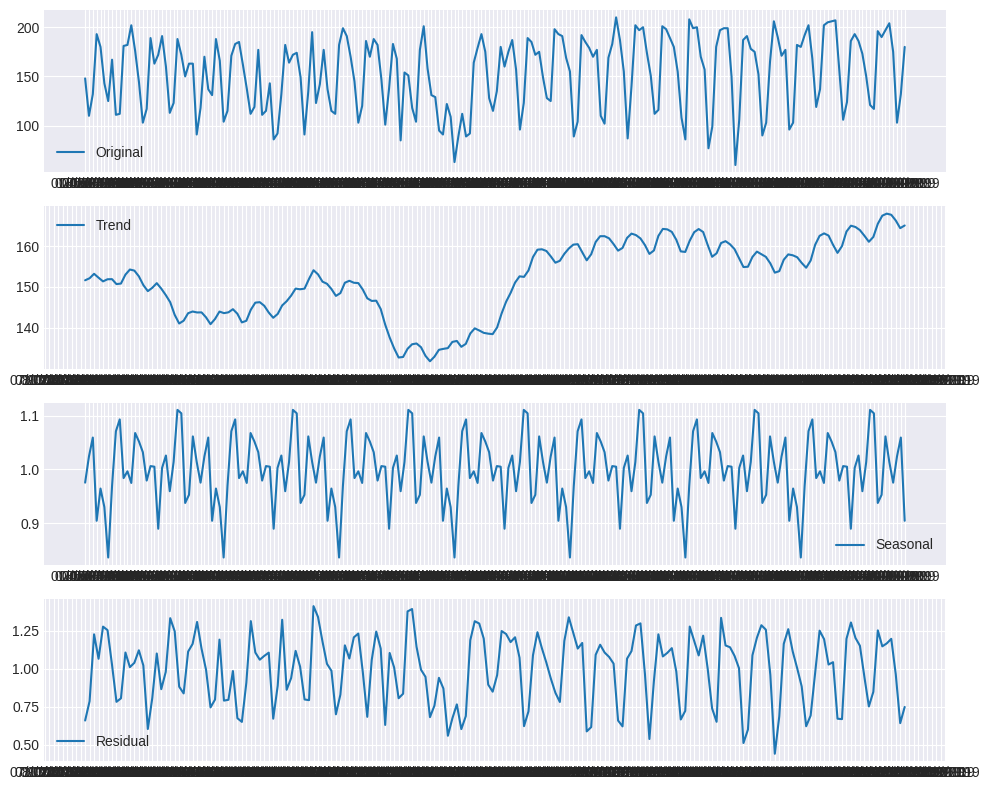

In [ ]:


result = seasonal_decompose(data_1['Call_Volume'], model='multiplicative', period=30)

# Plot
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(data_1.index, data_1['Call_Volume'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(data_1.index, result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(data_1.index, result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(data_1.index, result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
from statsmodels.tsa.stattools import adfuller

# Extract the 'Call_Volume' column for ADF test
call_volume_series = data_1['Call_Volume']

# Perform the ADF test
adf_result = adfuller(call_volume_series)

# Create a summary of the results
adf_summary = {
    "ADF Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Number of Lags Used": adf_result[2],
    "Number of Observations Used": adf_result[3],
    "Critical Values": adf_result[4]
}

adf_summary

#As u can see it is non-stationary


{'ADF Statistic': -2.1838334869542693,
 'p-value': 0.2121652010378317,
 'Number of Lags Used': 14,
 'Number of Observations Used': 199,
 'Critical Values': {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854}}

In [ ]:
data_1['Volume_Log'] = np.log(data_1['Call_Volume'])

In [ ]:
import numpy as np

# Apply logarithmic transformation to the 'Call_Volume'
data_1['Volume_Log'] = np.log(data_1['Call_Volume'])

# Perform the ADF test on the log-transformed data
adf_result_log = adfuller(data_1['Volume_Log'])

# Create a summary of the results for the log-transformed data
adf_summary_log = {
    "ADF Statistic": adf_result_log[0],
    "p-value": adf_result_log[1],
    "Number of Lags Used": adf_result_log[2],
    "Number of Observations Used": adf_result_log[3],
    "Critical Values": adf_result_log[4],
}

adf_summary_log

# As u can see, it is non-stationary.Because adf statistics is greater than critical value.


{'ADF Statistic': -2.3641435761008935,
 'p-value': 0.1521133482396319,
 'Number of Lags Used': 14,
 'Number of Observations Used': 199,
 'Critical Values': {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854}}

In [ ]:

data_1.to_csv('/content/Coursework-data.csv', index=False)


In [ ]:
print(data_1)

            Call_Volume  Volume_Log
Call_Date                          
01/03/2019          148    4.997212
02/03/2019          110    4.700480
03/03/2019          132    4.882802
04/03/2019          193    5.262690
05/03/2019          180    5.192957
...                 ...         ...
26/09/2019          204    5.318120
27/09/2019          175    5.164786
28/09/2019          103    4.634729
29/09/2019          132    4.882802
30/09/2019          180    5.192957

[214 rows x 2 columns]


In [ ]:
#Naive METHOD

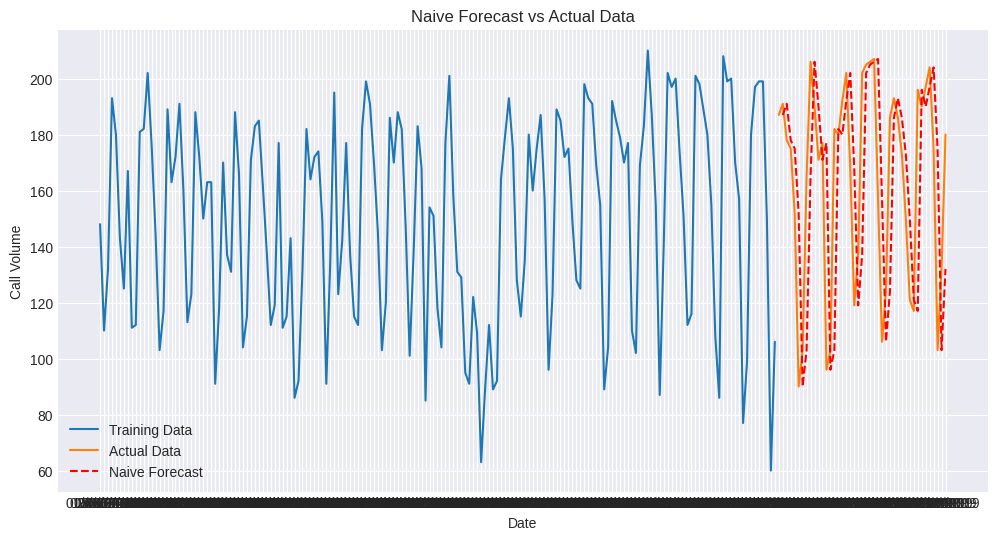

Mean Squared Error (MSE): 1395.1666666666667
Mean Absolute Percentage Error (MAPE): 19.409529270789022


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


train = data_1.iloc[:int(0.8 * len(data_1))]
test = data_1.iloc[int(0.8 * len(data_1)):]


naive_forecast = test.shift(1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Call_Volume'], label='Training Data')
plt.plot(test.index, test['Call_Volume'], label='Actual Data')
plt.plot(naive_forecast.index, naive_forecast['Call_Volume'], label='Naive Forecast', linestyle='--', color='red')
plt.title('Naive Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Call Volume')
plt.legend()
plt.show()

# Mean Squared Error (MSE)
mse = mean_squared_error(test['Call_Volume'][1:], naive_forecast['Call_Volume'].dropna())
print('Mean Squared Error (MSE):', mse)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE
mape = mean_absolute_percentage_error(test['Call_Volume'][1:], naive_forecast['Call_Volume'].dropna())
print('Mean Absolute Percentage Error (MAPE):', mape)


In [ ]:
# LINEAR REGRESSION

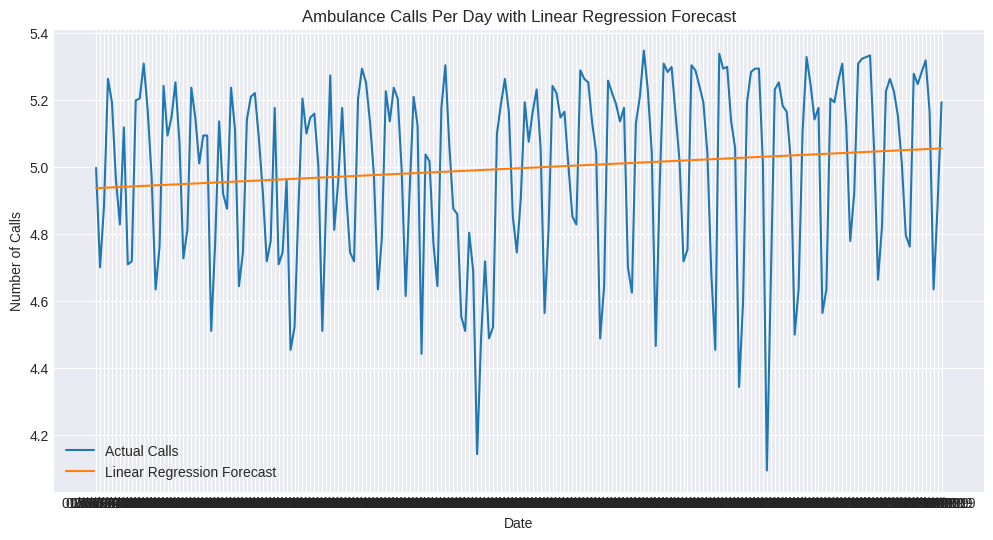

Mean Squared Error (MSE): 1351.1400475905227
Mean Absolute Percentage Error (MAPE): 23.95537914345775


In [ ]:


X = np.arange(len(data_1['Volume_Log'])).reshape(-1, 1)

y = data_1['Volume_Log'].values



model_lr = LinearRegression()

model_lr.fit(X, y)


sm_linear_forecast = model_lr.predict(X)



original_data_forecast = sm_linear_forecast
orig_scale_data_forecast = np.exp(sm_linear_forecast)

plt.figure(figsize=(12, 6))

plt.plot(data_1['Volume_Log'].index, data_1['Volume_Log'].values, label='Actual Calls')

plt.plot(data_1['Volume_Log'].index, original_data_forecast, label='Linear Regression Forecast', linestyle='-')

plt.title('Ambulance Calls Per Day with Linear Regression Forecast')

plt.xlabel('Date')

plt.ylabel('Number of Calls')

plt.legend()

plt.show()

# Calculating MSE and MAPE

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mse = mean_squared_error(np.exp(data_1['Volume_Log']), orig_scale_data_forecast)
mape = mean_absolute_percentage_error(np.exp(data_1['Volume_Log']), orig_scale_data_forecast)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
#MOVING AVERAGE

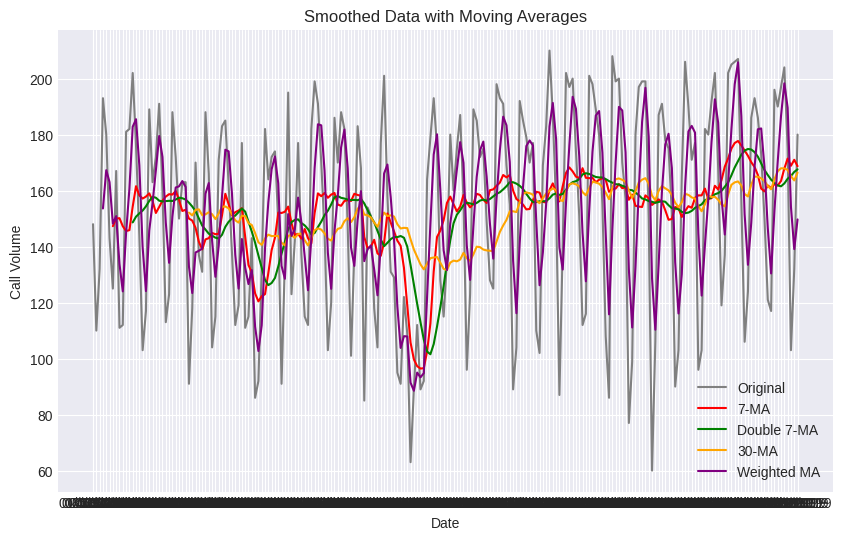

In [ ]:
# Calculating moving averages
ma_7 = data_1['Call_Volume'].rolling(window=7).mean()
double_ma_7 = ma_7.rolling(window=7).mean()
ma_30 = data_1['Call_Volume'].rolling(window=30).mean()


weights = [0.1, 0.2, 0.3, 0.4]
weighted_ma = data_1['Call_Volume'].rolling(window=len(weights)).apply(lambda x: np.dot(x, weights))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_1.index, data_1['Call_Volume'], label='Original', color='grey')
plt.plot(data_1.index, ma_7, label='7-MA', color='red')
plt.plot(data_1.index, double_ma_7, label='Double 7-MA', color='green')
plt.plot(data_1.index, ma_30, label='30-MA', color='orange')
plt.plot(data_1.index, weighted_ma, label='Weighted MA', color='purple')

plt.title('Smoothed Data with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Call Volume')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#SES ANALYSIS

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


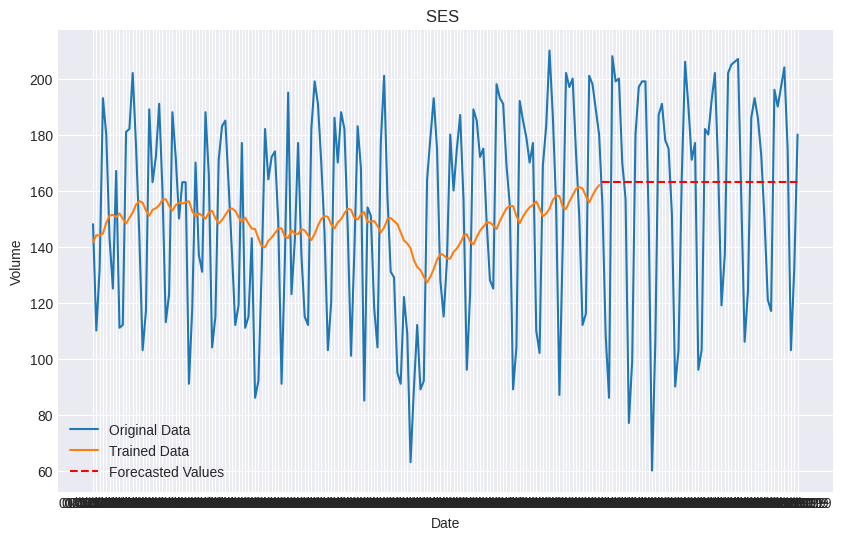

Mean Squared Error (MSE): 1638.6424015566724
Mean Absolute Percentage Error (MAPE): 27.177048901137812


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


train_size = int(len(data_1) * 0.72)
train1, test1 = data_1[:train_size], data_1[train_size:]

# Applying Holt's Linear Method to the training data
model = ExponentialSmoothing(train1['Call_Volume'], trend='add', damped_trend=True).fit()


forecast = model.forecast(len(test1))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_1.index, data_1['Call_Volume'], label='Original Data')
plt.plot(train1.index, model.fittedvalues, label='Trained Data')
plt.plot(test1.index, forecast, label='Forecasted Values', linestyle='--', color='red')
plt.title('SES ')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Mean Squared Error (MSE)
mse = mean_squared_error(test1['Call_Volume'], forecast)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test1['Call_Volume'].values - forecast) / np.where(test1['Call_Volume'].values != 0, test1['Call_Volume'].values, 1))) * 100

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)


In [ ]:
#Holt Winters

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error (MSE): 407.4018620972577
Mean Absolute Percentage Error (MAPE): 11.28791788554436
Forecasted Values:
149    185.905250
150    174.322237
151    167.983530
152    170.090828
153    151.296181
          ...    
268    186.150388
269    174.567375
270    168.228669
271    170.335966
272    151.541320
Length: 124, dtype: float64


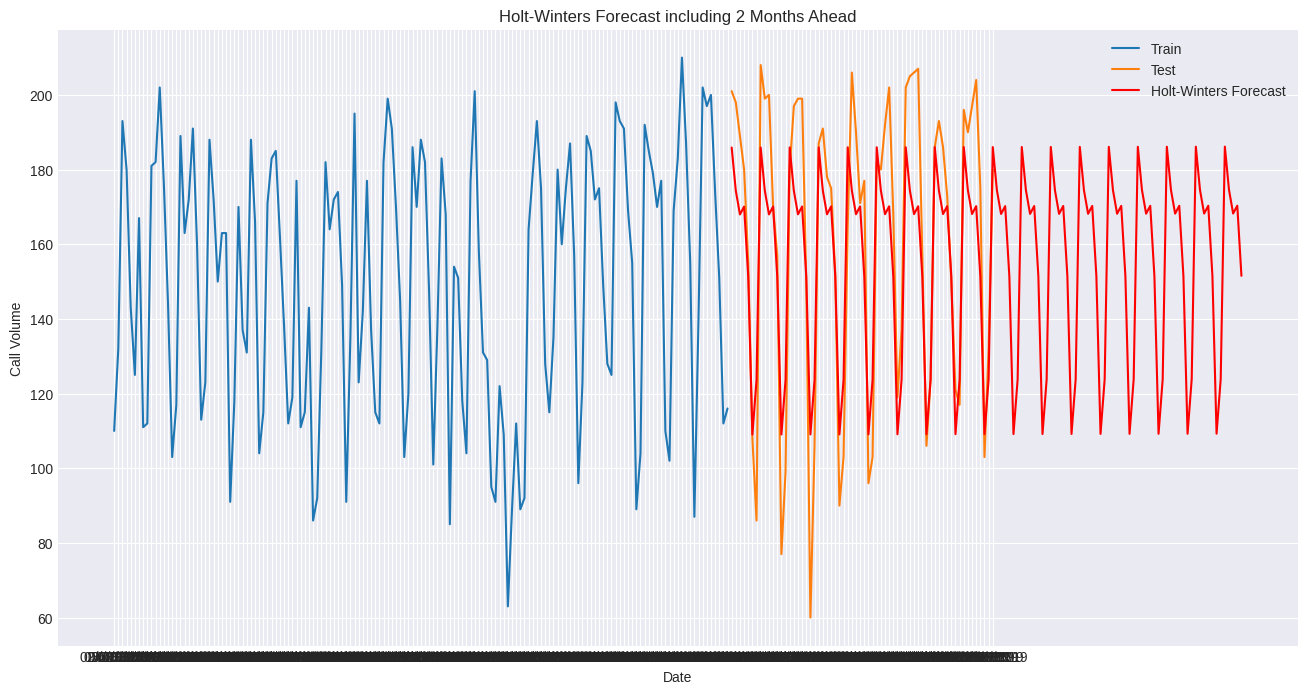

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_1' is your DataFrame and has a DateTimeIndex
train_size = int(len(data_1) * 0.70)
train, test = data_1.iloc[:train_size], data_1.iloc[train_size:]

# Holt-Winters method
model = ExponentialSmoothing(train['Call_Volume'], seasonal_periods=7, trend='add', seasonal='add')
fit = model.fit()

# Extend forecasting by 2 months
# Calculate number of days for 2 months approximation (assuming 30 days per month)
extra_periods = 60
forecast_periods = len(test) + extra_periods

forecast = fit.forecast(forecast_periods)

# Calculating metrics only for the test period
mse = mean_squared_error(test['Call_Volume'], forecast[:len(test)])
mape = np.mean(np.abs((test['Call_Volume'].values - forecast[:len(test)]) / np.where(test['Call_Volume'].values != 0, test['Call_Volume'].values, 1))) * 100

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Percentage Error (MAPE):', mape)

# Print forecasted values
print("Forecasted Values:")
print(forecast)

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(train['Call_Volume'], label='Train')
plt.plot(test['Call_Volume'], label='Test')
plt.plot(forecast.index, forecast.values, label='Holt-Winters Forecast', color='red')
plt.title('Holt-Winters Forecast including 2 Months Ahead')
plt.xlabel('Date')
plt.ylabel('Call Volume')
plt.legend()
plt.show()

In [ ]:
#ACF PACF

In [ ]:
#index_col='Call_Date'
#data_1.head()


print(data_1.index)  # This will show you the index details
print(data_1.head())  # This will display the first few rows of your DataFrame


Index(['01/03/2019', '02/03/2019', '03/03/2019', '04/03/2019', '05/03/2019',
       '06/03/2019', '07/03/2019', '08/03/2019', '09/03/2019', '10/03/2019',
       ...
       '21/09/2019', '22/09/2019', '23/09/2019', '24/09/2019', '25/09/2019',
       '26/09/2019', '27/09/2019', '28/09/2019', '29/09/2019', '30/09/2019'],
      dtype='object', name='Call_Date', length=214)
            Call_Volume  Volume_Log
Call_Date                          
01/03/2019          148    4.997212
02/03/2019          110    4.700480
03/03/2019          132    4.882802
04/03/2019          193    5.262690
05/03/2019          180    5.192957


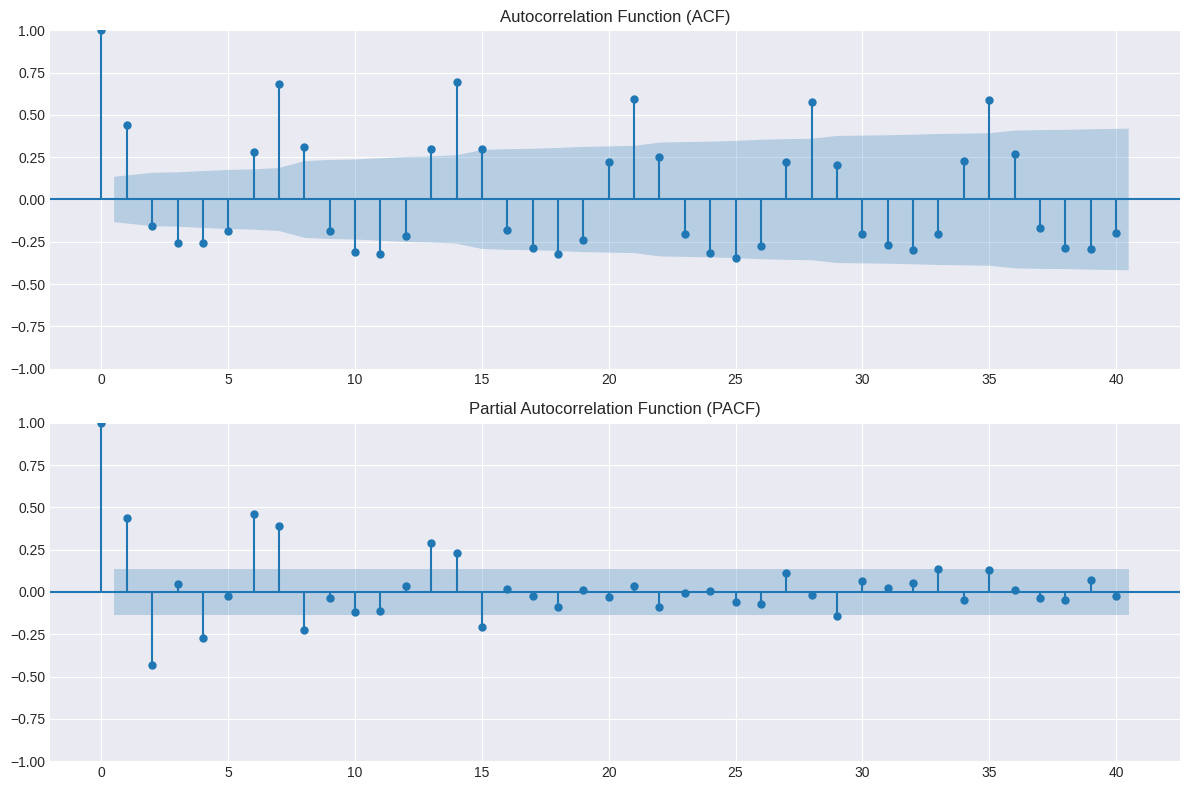

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF directly using the 'Call_Volume' from the DataFrame with 'Call_Date' as index
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(data_1['Call_Volume'], lags=40, ax=ax1, title="Autocorrelation Function (ACF)")
plot_pacf(data_1['Call_Volume'], lags=40, ax=ax2, title="Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()





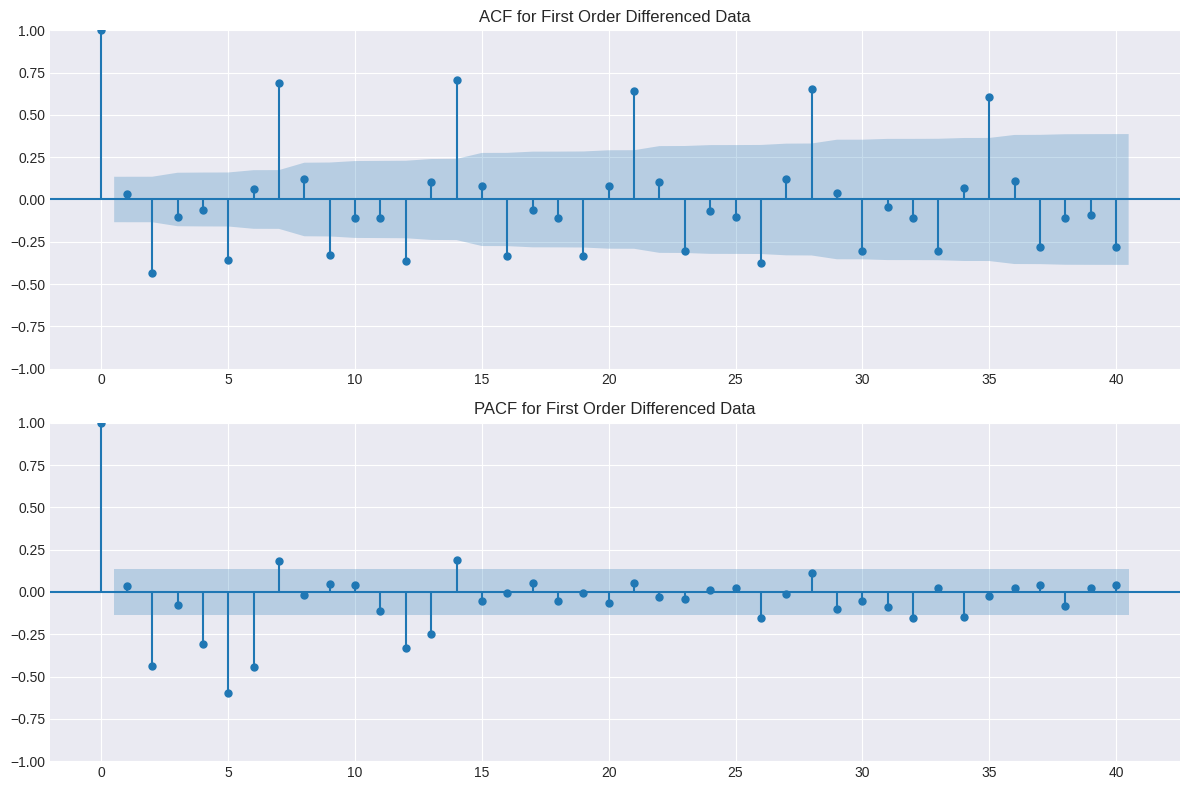

In [ ]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculating the first order difference of the 'Call_Volume'
data_1['Call_Volume_Diff'] = data_1['Call_Volume'].diff()

# Dropping NA values that result from differencing
data_diff = data_1.dropna()

# Plotting ACF and PACF for the differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(data_diff['Call_Volume_Diff'], lags=40, ax=ax1, title="ACF for First Order Differenced Data")
plot_pacf(data_diff['Call_Volume_Diff'], lags=40, ax=ax2, title="PACF for First Order Differenced Data")

plt.tight_layout()
plt.show()


In [ ]:
#Differenced

In [ ]:
data_1['Volume_Differenced'] = data_1['Call_Volume'].diff()
data_1 = data_1.dropna()

In [ ]:
data_1

,Call_Volume,Volume_Log,Call_Volume_Diff,Volume_Differenced
Call_Date,,,,
02/03/2019,110,4.700480,-38.0,-38.0
03/03/2019,132,4.882802,22.0,22.0
04/03/2019,193,5.262690,61.0,61.0
05/03/2019,180,5.192957,-13.0,-13.0
06/03/2019,143,4.962845,-37.0,-37.0
...,...,...,...,...
26/09/2019,204,5.318120,7.0,7.0
27/09/2019,175,5.164786,-29.0,-29.0
28/09/2019,103,4.634729,-72.0,-72.0


In [ ]:
diff6= data_1['Volume_Log'].diff().dropna()
diff6.head()

Call_Date
03/03/2019    0.182322
04/03/2019    0.379888
05/03/2019   -0.069733
06/03/2019   -0.230112
07/03/2019   -0.134531
Name: Volume_Log, dtype: float64

In [ ]:
#ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

                               SARIMAX Results                                
Dep. Variable:             Volume_Log   No. Observations:                  171
Model:                 ARIMA(7, 1, 1)   Log Likelihood                  36.453
Date:                Wed, 24 Apr 2024   AIC                            -54.905
Time:                        10:28:23   BIC                            -26.683
Sample:                             0   HQIC                           -43.453
                                - 171                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3834      0.075     -5.088      0.000      -0.531      -0.236
ar.L2         -0.5812      0.090     -6.427      0.000      -0.758      -0.404
ar.L3         -0.4938      0.085     -5.827      0.0

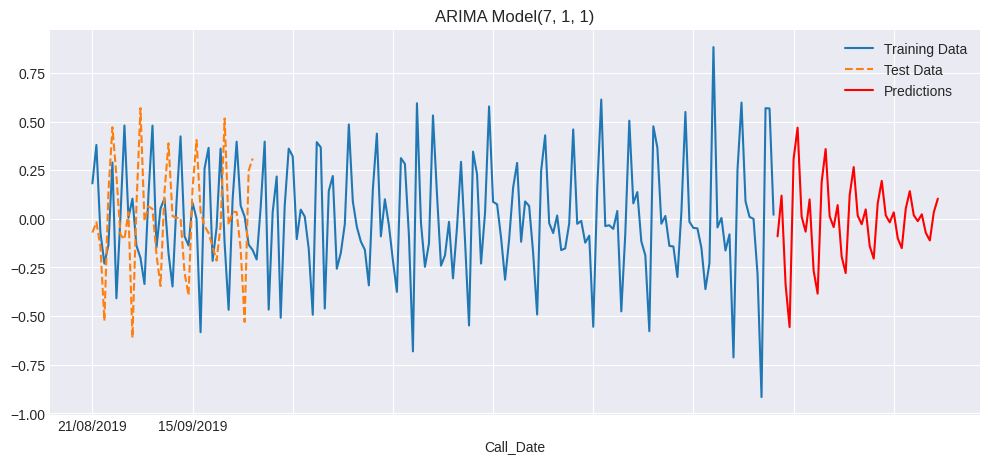

In [ ]:
#Arima Model



train_len = 171
train4 = diff6[0:train_len]
test4 = diff6[train_len:]

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train4, order=(7, 1, 1)) # also 4 1 4 will be assigned
model_fit = model.fit()

print(model_fit.summary())

start = len(train4)
end = len(train4) + len(test4) - 1

forecast_results = model_fit.get_forecast(steps=len(test4))
pred = forecast_results.predicted_mean.rename('ARIMA Predictions')
conf_int_ = forecast_results.conf_int()
plt.figure(figsize=(12, 5))
train4.plot(legend=True, label='Training Data')
test4.plot(legend=True, label='Test Data', style='--')
pred.plot(legend=True, label='Predictions', color='red')

plt.title('ARIMA Model(7, 1, 1)')
plt.legend()
plt.show()